# Construcción de tu propia capa en Keras

En este notebook vamos a construir una capa personalizada en Keras. Concretamente, vamos a diseñar una capa de regresión lineal donde, a los pesos, le aplicamos la función Softmax para que todos sean positivos y, además, sumen 1 directamente.

Esto nos será útil para la construcción de carteras, replicar índices, etc.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

Para construir una capa de Keras, primero debemos comprender cómo funciona el código desde un punto de vista global. Se muestra una clase de ejemplo que define una capa Densa.

- **build** es llamada al construir el modelo. Es la encargada de definir los pesos que deben ser entrenados.
- **call** es la función que define la fase forward de la capa. Será llamada en el fit, en el predict, etc. etc.

In [ ]:
class MiCapaDense(tf.keras.layers.Layer):
    def __init__(self, unidades=32, **kwargs):
        super(MiCapaDense, self).__init__(**kwargs)
        self.unidades = unidades

    # La función build es la encargada de definir los pesos que deben ser entrenados
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.unidades),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.unidades,),
                                 initializer='zeros',
                                 trainable=True)

    # La función call define la fase forward de la capa
    def call(self, inputs):
        return inputs @ self.w + self.b

Una vez hemos entendido cómo construir una capa custom, podemos hacer lo que queramos. Concretamente, vamos a diseñar una capa que transforme los pesos *w* para que sumen 1 y todos sean positivos.

In [2]:
class RegLinealSoftmax(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(RegLinealSoftmax, self).__init__(**kwargs)

    # La función build es la encargada de definir los pesos que deben ser entrenados
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True)

    # La función call define la fase forward de la capa
    def call(self, inputs):
        return inputs @ self.get_pesos()

    # Esta función es mía, para calcular a mano softmax
    def get_pesos(self):
        return tf.nn.softmax(self.w, axis=0)

In [3]:
lista_activos = ['A', 'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'ADM', 'ADSK',
                 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AKAM', 'ALL', 'ALLE',
                 'AMAT', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AON', 'APA', 'APD',
                 'APH', 'APTV', 'AVB', 'AVGO', 'AVY', 'AXP', 'AZO', 'BA', 'BAC',
                 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BK', 'BKNG',
                 'BLK', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH',
                 'CAT', 'CB', 'CBRE', 'CCI', 'CCL', 'CF', 'CHRW', 'CI', 'CINF',
                 'CL', 'CLX', 'CMA', 'CMCSA', 'CMG', 'CMI', 'CMS', 'CNP', 'COF',
                 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CTAS', 'CTRA', 'CTSH',
                 'CVS', 'CVX', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR',
                 'DIS', 'DLTR', 'DOV', 'DRI', 'DTE', 'DUK', 'DVA', 'EA', 'EBAY',
                 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'ELV', 'EMN', 'EMR', 'EOG', 'EQR',
                 'EQT', 'ES', 'ESS', 'ETN', 'ETR', 'EW', 'EXC', 'EXPD', 'EXPE', 'F',
                 'FAST', 'FCX', 'FDX', 'FE', 'FFIV', 'FI', 'FIS', 'FITB', 'FMC',
                 'FSLR', 'GD', 'GE', 'GEN', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GOOG',
                 'GOOGL', 'GPC', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HD', 'HES', 'HIG',
                 'HON', 'HPQ', 'HRL', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IFF', 'INTC',
                 'INTU', 'IP', 'IPG', 'IRM', 'ISRG', 'ITW', 'IVZ', 'JCI', 'JNJ',
                 'JNPR', 'JPM', 'K', 'KDP', 'KEY', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX',
                 'KO', 'KR', 'L', 'LDOS', 'LEN', 'LH', 'LHX', 'LLY', 'LMT', 'LNC',
                 'LOW', 'LRCX', 'LUV', 'LYB', 'MA', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO',
                 'MDT', 'MET', 'META', 'MHK', 'MKC', 'MLM', 'MMC', 'MMM', 'MO', 'MOS',
                 'MPC', 'MRK', 'MRO', 'MS', 'MSFT', 'MSI', 'MTB', 'NDAQ', 'NEE', 'NEM',
                 'NFLX', 'NI', 'NKE', 'NOC', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE',
                 'NVDA', 'NWL', 'NWSA', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PARA',
                 'PAYX', 'PCAR', 'PCG', 'PEG', 'PFE', 'PG', 'PGR', 'PH', 'PHM',
                 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX',
                 'PTC', 'PWR', 'PXD', 'QCOM', 'RCL', 'RF', 'RHI', 'RL', 'ROK', 'ROP',
                 'ROST', 'RSG', 'RTX', 'RVTY', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SJM',
                 'SLB', 'SNA', 'SO', 'SPG', 'SPGI', 'SRE', 'STT', 'STX', 'STZ', 'SWK',
                 'SYK', 'SYY', 'T', 'TAP', 'TEL', 'TFC', 'TGT', 'TJX', 'TMO', 'TPR',
                 'TROW', 'TRV', 'TSCO', 'TSN', 'TT', 'TXT', 'UHS', 'UNH', 'UNP', 'UPS',
                 'URI', 'USB', 'V', 'VFC', 'VLO', 'VMC', 'VRSN', 'VTR', 'VZ', 'WAT',
                 'WEC', 'WELL', 'WFC', 'WHR', 'WM', 'WMB', 'WMT', 'WY', 'WYNN', 'XOM',
                 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

In [4]:
precios = yf.download(lista_activos, start="2022-01-01", end="2023-01-01")["Adj Close"]
retornos = np.log(precios).diff().dropna()

[*********************100%%**********************]  326 of 326 completed


In [5]:
precios_sp500 = yf.download("SPY", start="2022-01-01", end="2023-01-01")["Adj Close"]
retornos_sp500 = np.log(precios_sp500).diff().dropna()

[*********************100%%**********************]  1 of 1 completed


In [6]:
def build_model(input_dim, optimizer="SGD"):
  input_layer = tf.keras.layers.Input(shape=(input_dim))
  output_layer = RegLinealSoftmax()(input_layer)

  model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
  model.compile(loss="mse", optimizer=optimizer)
  return model

In [7]:
model = build_model(len(lista_activos), optimizer="Adam")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 326)]             0         
                                                                 
 reg_lineal_softmax (RegLin  (None, 1)                 326       
 ealSoftmax)                                                     
                                                                 
Total params: 326 (1.27 KB)
Trainable params: 326 (1.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
num_epochs = 1000
hist = model.fit(retornos, retornos_sp500, epochs=num_epochs)

Epoch 1/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5444e-05
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5421e-05
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5393e-05
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5358e-05
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5320e-05
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5279e-05
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5235e-05
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5187e-05
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5142e-05
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5091e-05
Epoch 11/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.5040e-05
Epoch 12/1000
8/8 [==============================] - 0s 2ms/step - loss: 1.4987e-05
E

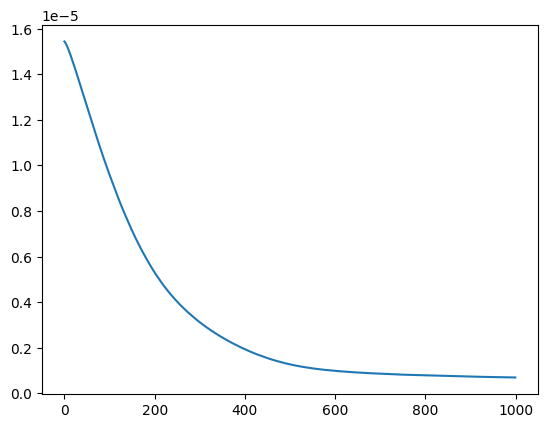

In [9]:
plt.plot(hist.history["loss"])

In [11]:
model.layers[1]

In [12]:
pesos = model.layers[1].get_pesos().numpy()
pesos.sum()

1.0

<BarContainer object of 326 artists>

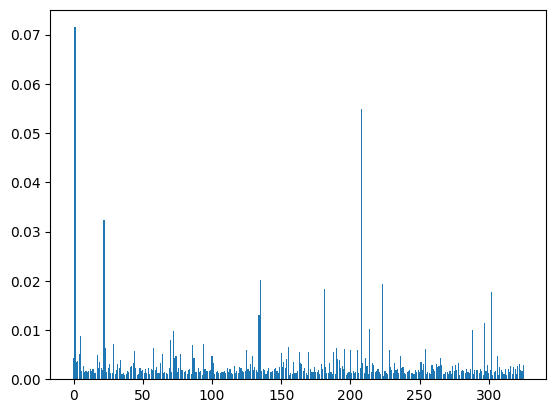

In [13]:
plt.bar(range(len(pesos)), pesos[:, 0])

In [14]:
retornos_cartera = (retornos @ pesos)[0]
retornos_cartera.shape

(250,)

In [15]:
retornos_sp500.shape

(250,)

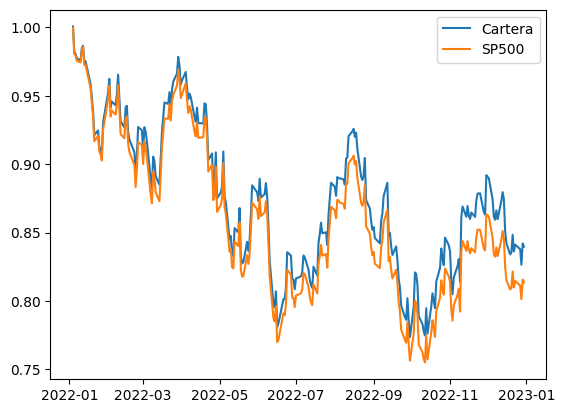

In [16]:
plt.plot(np.exp(retornos_cartera.cumsum()), label="Cartera")
plt.plot(np.exp(retornos_sp500.cumsum()), label="SP500")
plt.legend()
plt.show()

In [17]:
pesos = model.layers[1].get_pesos().numpy()
retornos.columns.values[np.where(pesos[:, 0] > 0.01)[0]]

array(['AAPL', 'AMZN', 'GOOG', 'GOOGL', 'LLY', 'MSFT', 'NFLX', 'NVDA',
       'TMO', 'UNH', 'V'], dtype=object)